<a href="https://colab.research.google.com/github/Tithimohanta/CNN/blob/main/210149_CNN_AI_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Clone your GitHub repository (custom images + model folder)
!git clone https://github.com/Tithimohanta/CNN_AI-ML.git



Cloning into 'CNN_AI-ML'...
remote: Enumerating objects: 3271, done.
remote: Counting objects: 100% (3271/3271), done.
remote: Compressing objects: 100% (3268/3268), done.
remote: Total 3271 (delta 1), reused 3267 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3271/3271), 28.34 MiB | 23.77 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [ ]:
# Basic imports
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [ ]:
# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cuda


In [ ]:
mean = (0.4914, 0.4822, 0.4465)
std  = (0.2470, 0.2435, 0.2616)


In [ ]:
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])



In [ ]:
test_transform = transforms.Compose([
    transforms.Resize((32, 32)),   # 🔥 THIS FIXES THE ERROR
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])



In [ ]:
train_dataset = torchvision.datasets.CIFAR10(
    root="./data",
    train=True,
    download=True,
    transform=train_transform
)

test_dataset = torchvision.datasets.CIFAR10(
    root="./data",
    train=False,
    download=True,
    transform=test_transform
)


100%|██████████| 170M/170M [00:05<00:00, 31.0MB/s]


In [ ]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=64, shuffle=False)

classes = train_dataset.classes
print(classes)


['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.features = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.classifier = nn.Sequential(
            nn.Linear(128 * 4 * 4, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x


In [ ]:
model = CNN().to(device)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
num_epochs = 20
train_losses = []
train_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100 * correct / total

    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Loss: {epoch_loss:.4f}  Accuracy: {epoch_acc:.2f}%")


Epoch [1/20] Loss: 1.5791  Accuracy: 41.71%
Epoch [2/20] Loss: 1.2810  Accuracy: 53.82%
Epoch [3/20] Loss: 1.1481  Accuracy: 59.23%
Epoch [4/20] Loss: 1.0644  Accuracy: 62.56%
Epoch [5/20] Loss: 1.0014  Accuracy: 65.04%
Epoch [6/20] Loss: 0.9556  Accuracy: 66.70%
Epoch [7/20] Loss: 0.9148  Accuracy: 68.02%
Epoch [8/20] Loss: 0.8803  Accuracy: 69.62%
Epoch [9/20] Loss: 0.8465  Accuracy: 70.61%
Epoch [10/20] Loss: 0.8190  Accuracy: 72.04%
Epoch [11/20] Loss: 0.7978  Accuracy: 72.41%
Epoch [12/20] Loss: 0.7727  Accuracy: 73.48%
Epoch [13/20] Loss: 0.7559  Accuracy: 74.34%
Epoch [14/20] Loss: 0.7337  Accuracy: 74.80%
Epoch [15/20] Loss: 0.7119  Accuracy: 75.74%
Epoch [16/20] Loss: 0.7034  Accuracy: 76.08%
Epoch [17/20] Loss: 0.6868  Accuracy: 76.60%
Epoch [18/20] Loss: 0.6710  Accuracy: 77.33%
Epoch [19/20] Loss: 0.6597  Accuracy: 77.76%
Epoch [20/20] Loss: 0.6449  Accuracy: 78.19%


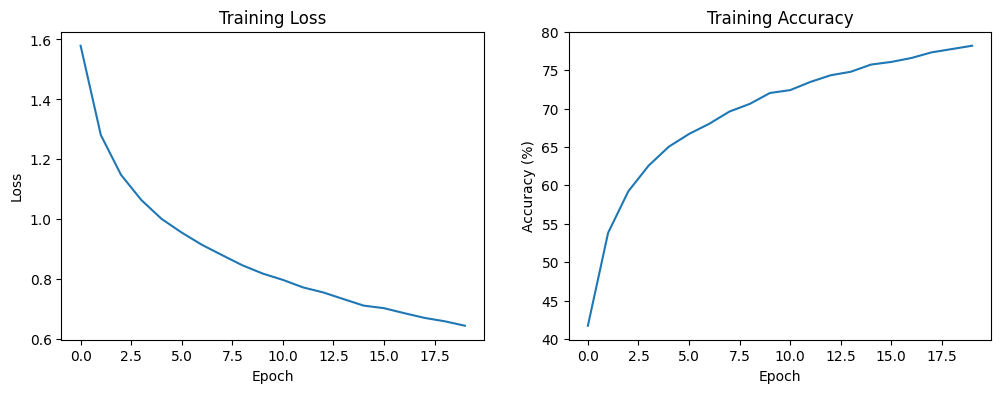

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(train_losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(1,2,2)
plt.plot(train_accuracies)
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")

plt.show()


In [ ]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

test_acc = 100 * np.mean(np.array(all_preds) == np.array(all_labels))
print("Test Accuracy:", test_acc)


Test Accuracy: 80.71000000000001


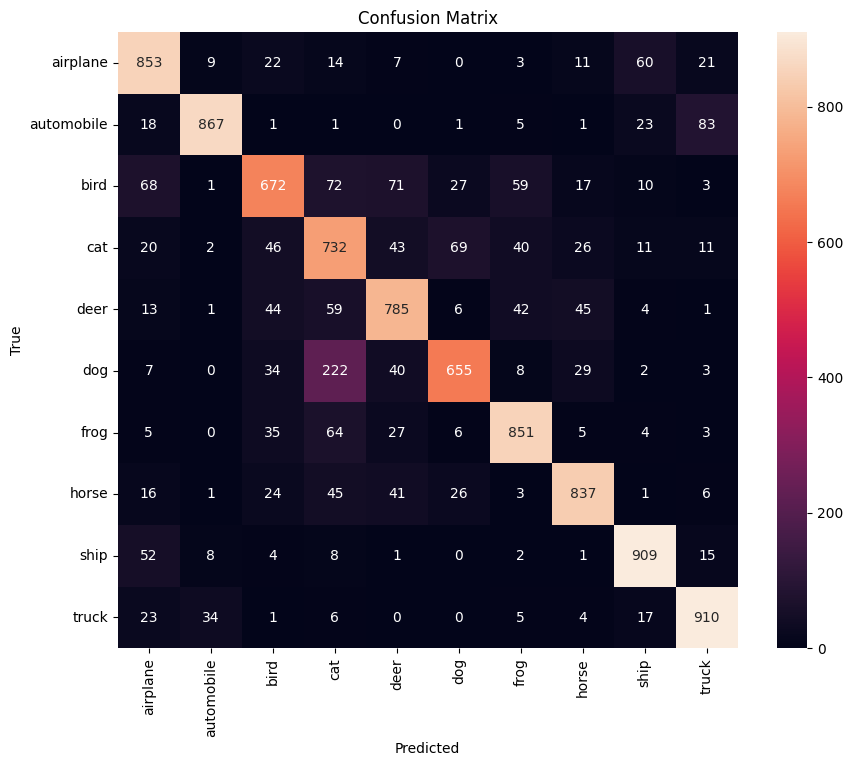

In [ ]:
cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=classes,
            yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
os.makedirs("CNN/model", exist_ok=True)
torch.save(model.state_dict(), "CNN/model/cifar10_cnn.pth")



In [ ]:
image_dir = "CNN/Custom"   # phone images from GitHub

model.load_state_dict(torch.load("CNN/model/cifar10_cnn.pth", map_location=device))
model.eval()

def predict_image(image_path):
    image = Image.open(image_path).convert("RGB")
    img_tensor = test_transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(img_tensor)
        probs = torch.softmax(output, dim=1)
        conf, pred = torch.max(probs, 1)

    return classes[pred.item()], conf.item(), image


In [41]:
image_dir = "CNN/Custom"   # phone images from GitHub

model.load_state_dict(torch.load("CNN/model/cifar10_cnn.pth", map_location=device))
model.eval()

def predict_image(image_path):
    image = Image.open(image_path).convert("RGB")
    img_tensor = test_transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(img_tensor)
        probs = torch.softmax(output, dim=1)
        conf, pred = torch.max(probs, 1)

    return classes[pred.item()], conf.item(), image

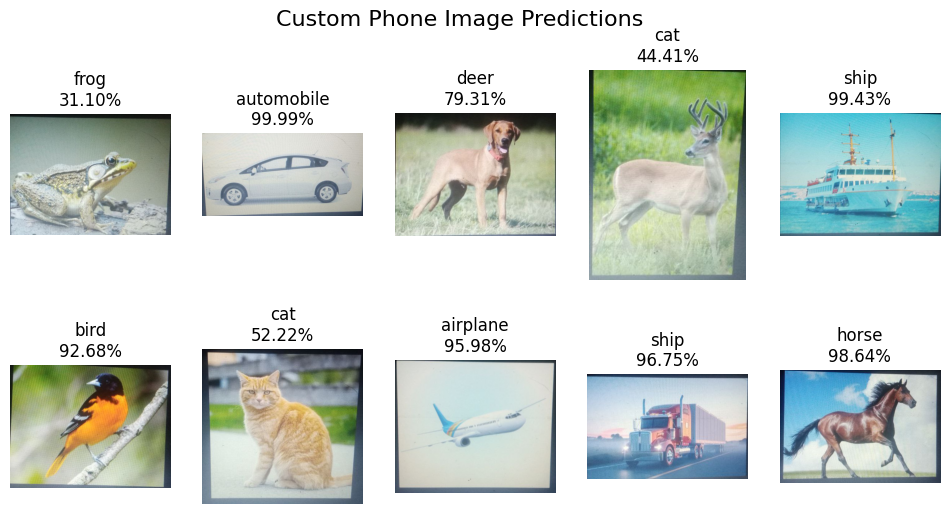

In [45]:
image_dir = "CNN_AI-ML/Custom"   # phone images from GitHub

images = os.listdir(image_dir)

plt.figure(figsize=(12,6))

for i, img_name in enumerate(images):
    path = os.path.join(image_dir, img_name)
    label, conf, img = predict_image(path)

    plt.subplot(2,5,i+1)
    plt.imshow(img)
    plt.title(f"{label}\n{conf*100:.2f}%")
    plt.axis("off")

plt.suptitle("Custom Phone Image Predictions", fontsize=16)
plt.show()

In [47]:
wrong = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        for i in range(len(labels)):
            if preds[i] != labels[i]:
                wrong.append((images[i], labels[i], preds[i]))
        if len(wrong) >= 3:
            break


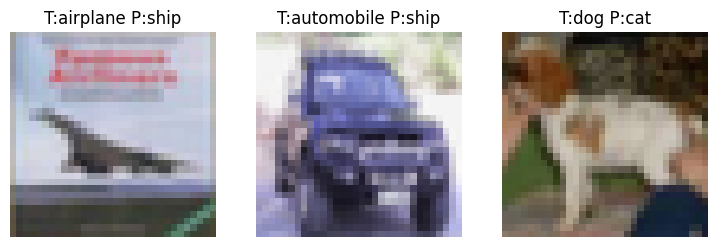

In [48]:
plt.figure(figsize=(9,3))

for i in range(3):
    img, true, pred = wrong[i]
    img = img.cpu().permute(1,2,0) * torch.tensor(std) + torch.tensor(mean)

    plt.subplot(1,3,i+1)
    plt.imshow(img)
    plt.title(f"T:{classes[true]} P:{classes[pred]}")
    plt.axis("off")

plt.show()
